# Ergodicity in Random Matrices

Author: M. Suzen

Last Up Date: January 2018
 
A notebook for `arXiv:1704.08303` under `bristol/works/spectralErgodicity`.

## Requirements

### Software

For this sheet `Bristol 0.2.0` is needed with Python 2.7, due to datasets.

### Data files: Generated Circular Ensembles

The following data files should be available

* `./data_cue.obj` : CUE data
* `./data_coe.obj` : COE data
* `./data_cse.obj` : CSE data

These can be either generated or a copy can be downloaded from zenodo.

#### Get from zenodo

Via script under the same directory as this notebook at `get_data/get_from_zenodo.sh`. Apply the following under `gen_data`:

`source get_from_zenodo.sh`

#### Generate the data locally (Takes couple of hours! depending on the number of cores.)

To generate the data run `data_gen.py` under `gen_data`.

### Dataset dictionary

Each dataset is a dictionary;

* The following keys, `['N1024', 'N64', 'N256', 'N512', 'N128', 'N768']`, representing different matrix size in the first

* Each matrix size keys contains an other dictionary with the following keys:
    * `local_seeds` : seeds used in different cores, integer array of size number of cores used (4 here).
    * `matrix_size` : integer, in
    * `number_of_matrices` : number of matrices used, M
    * `c_eigen`: set of eigenvalues from M=40 different realization of matrices.


#### Import packages and print versions

In [13]:
import bristol
import numpy as np
import matplotlib.pylab as plt
(
    "Bristol", bristol.__version__,
    "numpy", np.__version__,
    "matplotlib", plt.__version__
)

('Bristol', '0.2.0', 'numpy', '1.13.1', 'matplotlib', '1.13.1')

#### Load data as dictionary

Load eigenvalues data for $N=64, 256, 128, 512, 768, 1024$ for $M=40$ realisation for set of circular ensembles, i.e., CUE, COE and CSE.

In [2]:
import os
os.getcwd()
import pickle 
import os
os.getcwd() 
fp       = open("./gen_data/data_cue.obj", "rb") 
data_cue = pickle.load(fp)
fp.close()
fp       = open("./gen_data/data_coe.obj", "rb") 
data_coe = pickle.load(fp)
fp.close()
fp       = open("./gen_data/data_cse.obj", "rb") 
data_cse = pickle.load(fp)
fp.close()

#### Sample eigenvalues and plot

In [3]:
# Choose some index
n_eigen   = len(data_cue['N64']['c_eigen'])
np.random.seed(342349688)
s_inx = np.random.choice(np.arange(n_eigen), 200, replace=False)

In [4]:
cue_eigen = data_cue['N64']['c_eigen'][s_inx] # Initial set
coe_eigen = data_coe['N64']['c_eigen'][s_inx] 
cse_eigen = data_cse['N64']['c_eigen'][s_inx]

#### Plot Eigenvalues on the complex plane

/home/msuzen/anaconda3/envs/p27/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


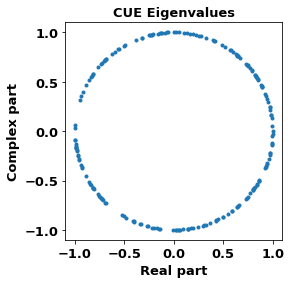

In [5]:
%matplotlib inline
x_cue=np.real(cue_eigen); x_coe=np.real(coe_eigen); x_cse=np.real(cse_eigen); 
y_cue=np.imag(cue_eigen); y_coe=np.imag(coe_eigen); y_cse=np.imag(cse_eigen);
font = {
        'family' : 'normal',
        'weight' : 'bold',
        'size'   : 13,
       }

plt.rc('font', **font)
plt.plot(x_cue, y_cue, '.')
plt.ylabel("Complex part",**font)
plt.xlabel("Real part",**font)
plt.title("CUE Eigenvalues", **font)
plt.axes().set_aspect('equal')
plt.savefig('cue_eigen64.eps', format='eps', dpi=1000, bbox_inches='tight')

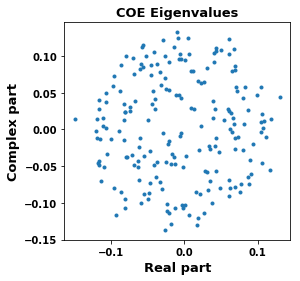

In [6]:
%matplotlib inline
plt.plot(x_coe,y_coe,'.')
plt.rc('font', **font)
plt.ylabel("Complex part",**font)
plt.xlabel("Real part",**font)
plt.title("COE Eigenvalues", **font)
plt.axes().set_aspect('equal')
plt.savefig('coe_eigen64.eps', format='eps', dpi=1000, bbox_inches='tight')

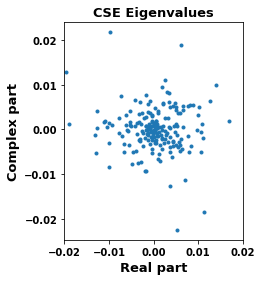

In [7]:
%matplotlib inline
plt.plot(x_cse,y_cse,'.')
plt.rc('font', **font)
plt.ylabel("Complex part",**font)
plt.xlabel("Real part",**font)
plt.title("CSE Eigenvalues", **font)
plt.axes().set_aspect('equal')
plt.xlim([-0.02, 0.02])
plt.savefig('cse_eigen64.eps', format='eps', dpi=1000, bbox_inches='tight')

#### Approach to Spectral Ergodicity : Decay function

In [8]:
from bristol.spectral import Ergodicity 
ergo          = Ergodicity()

In [9]:
ensemble_size = 40
Ns            = [64,128,256,512,768,1024]
delta_rad     = 1e-4
data_c        = data_cue
D_se_cue = ergo.approach_se(Ns=Ns, ensemble_size=ensemble_size, delta_rad=delta_rad, eigen_data=data_c)
data_c        = data_coe
D_se_coe = ergo.approach_se(Ns=Ns, ensemble_size=ensemble_size, delta_rad=delta_rad, eigen_data=data_c)
data_c        = data_cse
D_se_cse = ergo.approach_se(Ns=Ns, ensemble_size=ensemble_size, delta_rad=delta_rad, eigen_data=data_c)

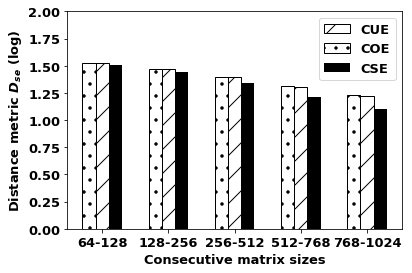

In [19]:
%matplotlib inline
font = {
        'family' : 'normal',
        'weight' : 'bold',
        'size'   : 13
       }
plt.rc('font', **font)
plt.title("",**font)
plt.ylim(ymax=2.0)
ax     = plt.subplot(111)
x      = np.arange(1, 6)
labels = ['64-128', '128-256', '256-512', '512-768', '768-1024']
r1=ax.bar(x, np.log10(D_se_cue),width=0.2,fill=False,align='center', hatch='/', label='CUE')
r2=ax.bar(x-0.2, np.log10(D_se_coe),width=0.2,fill=False,align='center',hatch='.')
r3=ax.bar(x+0.2, np.log10(D_se_cse),width=0.2,color='black',align='center')
plt.xticks(x, labels)
ax.legend((r1[0], r2[0], r3[0]), ('CUE', 'COE', 'CSE'), loc=1)
ax.set_xlabel("Consecutive matrix sizes", **font)
ax.set_ylabel("Distance metric $D_{se}$ (log)", **font)
#plt.savefig('distance_metric_Dse.eps', format='eps', dpi=1000, bbox_inches='tight')

#### CUE: Spectral plots  (not used in the manuscript)

In [20]:
#
# from bristol.spectral.Ergodicity import spectral_density
# from bristol.spectral.Ergodicity import thirumalai_mountain
# from bristol.spectral.Ergodicity import kl_distance_symmetric
#
ensemble_size = 40
Ns            = [64,128,256,512,768,1024]
delta_rad     = 1e-1
N             = 512
c_eigen       = data_cue['N' + str(N)]['c_eigen']
omega_cue_512 = ergo.thirumalai_mountain(c_eigen, ensemble_size, N, delta_rad=delta_rad)
N             = 768
c_eigen       = data_cue['N' + str(N)]['c_eigen']
omega_cue_768 = ergo.thirumalai_mountain(c_eigen, ensemble_size, N, delta_rad=delta_rad)
N             = 1024
c_eigen       = data_cue['N' + str(N)]['c_eigen']
omega_cue_1024 = ergo.thirumalai_mountain(c_eigen, ensemble_size, N, delta_rad=delta_rad)

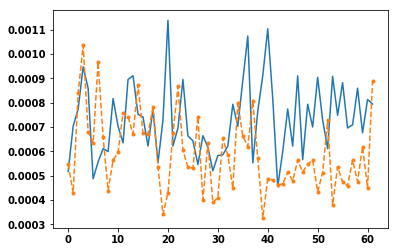

In [21]:
%matplotlib inline
plt.plot(omega_cue_768, '-')
plt.plot(omega_cue_1024, '.--')